## Final Project Submission

Please fill out:
* Student name: Jaklyn Soler
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:


# Module 2 Project: King County Housing Data Analysis

key differences from project one: improvement on the jupyter notebook jargon.

#synopsis on project

I would like to define my stakeholders as developers in construction. 

For this project, it will be up to you to define a stakeholder and business problem appropriate to this dataset.

Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)
You pose at least 3 meaningful questions and answer them through EDA. These questions should be well labeled and easy to identify inside the notebook.
Level Up: Each question is clearly answered with a visualization that makes the answer easy to understand.
Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project.

For my scientific data analysis I have chosen my stakeholders 

You provide at least 1 paragraph explaining your final model.
You pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset.

# Data Introduction and Cleaning

### The packages and data can be directly loaded into Jupyter Notebook

In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import pickle
import matplotlib as plt

pyo.init_notebook_mode()


In [2]:
df_data = pd.read_csv('data/kc_house_data.csv')

### Here is a preview of the data:

In [3]:
df_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The shape of the data can be observed:

In [4]:
df_data.shape

(21597, 21)

### The types of data can be observed to determine categorical and continuous features.

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### A histogram can be used to identify categorical or continuous features. The descriptions on these columns have been pulled from the King County website.

The vertical bars in histograms indicate **categorical** feature columns:
 - **bathrooms:** Number of bathrooms, where .5 accounts for a room with a toilet but no shower.
 - **bedrooms:** Number of bedrooms.
 - **condition:** An index from 1 to 5 on the condition of the apartment.
 - **floors:** Number of floors.
 - **grade:** An index from 1 to 13, where 1-3 falls short of building construction, and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
 - **year renovated:** The year of the last house renovation.
 - **view:** An index from 0 to 4 of how good the view of the property was.
 - **waterfront:** A dummy variable for whether the apartment was overlooking the waterfront or not.
 - **zipcode:** What zipcode area the house is in. 

The continuous distributions in histograms indicate **continuous** feature columns:
 - **id:** Unique ID for each home sold.
 - **lat:** Lattitude.
 
 - **long:** Longitude.
 
 - **price:** Price of each home sold.
 
 - **sqft_above:** The square footage of the interior housing spae that is above ground level.
 
 - **sqft_living:** Square footage of the apartments interior living space.
 
 - **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors.
 
 - **sqft_lot:** Square footage of the land space.
 
 - **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors.
 
 - **yr_built:** The year the house was initially built.

In [6]:
df_data.hist(figsize=(18,15), bins='auto');

### Two columns, date and sqft_basement, didn't populate from the dataframe.

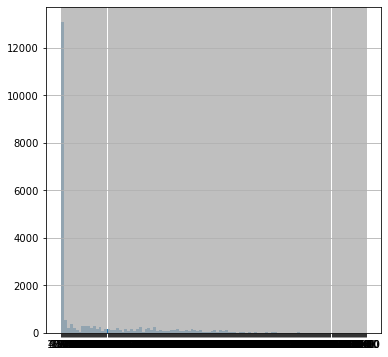

In [7]:
df_data.sqft_basement.hist(figsize=(6,6), bins='auto');

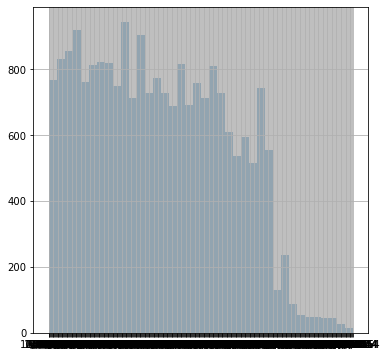

In [8]:
df_data.date.hist(figsize=(6,6), bins='auto');

### The '?' values may be affecting the lack of histogram population. 

The '?' values will be changed to the value of sqft_living minus sqft_above which is the total area of interior square feet minus the square footage above ground. Thus, leaving us with the square footage below ground. 

In [9]:
df_data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
506.0         1
2810.0        1
1913.0        1
784.0         1
1024.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [10]:
haiku = df_data[df_data['sqft_basement'] == '?']

In [11]:
haiku.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656


In [12]:
haiku.drop(columns='sqft_basement', inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
haiku['sqft_basement'] = haiku['sqft_living'] - haiku['sqft_above']

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
haiku.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,1995,0.0,98003,47.3097,-122.327,2238,6819,0
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,1921,0.0,98002,47.3089,-122.210,1060,5095,0
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,2014,0.0,98053,47.6848,-122.016,3625,5639,0
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,2002,0.0,98010,47.3420,-122.025,3350,39750,0
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,1980,0.0,98038,47.3624,-122.031,1540,11656,380


In [15]:
indexNames = df_data[ df_data['sqft_basement'] == '?' ].index
# Delete these row indexes from dataFrame
df_data.drop(indexNames , inplace=True)

In [16]:
df_data[df_data['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [17]:
frames = [haiku, df_data]

df = pd.concat(frames)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




The '?' values from sqft_basement have been removed.

In [18]:
df.sqft_basement.value_counts()

0.0       12826
0           284
600.0       217
500.0       209
700.0       208
          ...  
1990.0        1
1770.0        1
861.0         1
810           1
602.0         1
Name: sqft_basement, Length: 397, dtype: int64

### The date will be formatted into a datetime object.

In [19]:
df.date.value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/24/2015      1
11/2/2014      1
5/17/2014      1
1/31/2015      1
3/8/2015       1
Name: date, Length: 372, dtype: int64

In [20]:
df.date = pd.to_datetime(df['date'], format = '%m/%d/%Y')

In [21]:
df.date.value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

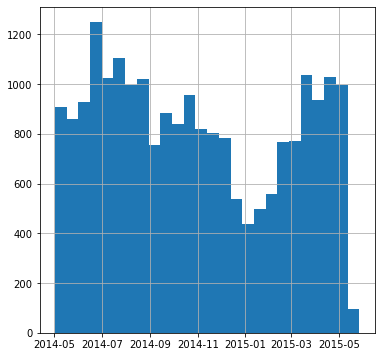

In [22]:
df.date.hist(figsize=(6,6), bins='auto');

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 6 to 21596
Data columns (total 21 columns):
bathrooms        21597 non-null float64
bedrooms         21597 non-null int64
condition        21597 non-null int64
date             21597 non-null datetime64[ns]
floors           21597 non-null float64
grade            21597 non-null int64
id               21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
price            21597 non-null float64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
sqft_living      21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot         21597 non-null int64
sqft_lot15       21597 non-null int64
view             21534 non-null float64
waterfront       19221 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

### The dataframe columns can be inspected individually.

### Date: Date of the home sale.

In [24]:
df.date.describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

### Price: Price of each home sold.

In [25]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

### Bedrooms: Number of bedrooms.

In [26]:
df.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

This row with a count of 33 bedrooms is an outlier and can be removed.

In [27]:
df[df['bedrooms'] == 33]

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
15856,1.75,33,5,2014-06-25,1.0,7,2402100895,47.6878,-122.331,640000.0,...,580.0,1620,1330,6000,4700,0.0,0.0,1947,0.0,98103


In [28]:
new = df.drop(15856)

In [29]:
new[new['bedrooms'] == 33]

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode


### Bathrooms: Number of bathrooms.

In [30]:
new.bathrooms.describe()

count    21596.000000
mean         2.115843
std          0.768998
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

8 would be a high number of bathrooms for a 3 bedroom home, but is reasonable for these 6 and 7 bedroom homes. 

In [31]:
new[new['bathrooms'] == 8]

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
7245,8.0,6,4,2014-10-13,2.5,13,6762700020,47.6298,-122.323,7700000.0,...,3480.0,12050,3940,27600,8800,3.0,0.0,1910,1987.0,98102
12764,8.0,7,3,2014-05-05,3.0,12,1225069038,47.6675,-121.986,2280000.0,...,4130.0,13540,4850,307752,217800,4.0,0.0,1999,0.0,98053


### Sqft_Living: Interior living space.

In [32]:
new.sqft_living.describe()

count    21596.000000
mean      2080.343165
std        918.122038
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [33]:
new[new['sqft_living'] <= 400]

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
860,0.75,1,3,2014-06-20,1.0,5,1723049033,47.4810,-122.323,245000.0,...,0.0,380,1170,15000,15000,0.0,0.0,1963,0.0,98168
15367,0.75,1,5,2014-07-01,1.0,5,2856101479,47.6778,-122.389,276000.0,...,0.0,370,1340,1801,5000,0.0,0.0,1923,0.0,98117
21316,1.00,1,4,2015-05-11,1.0,6,9266700190,47.6938,-122.347,245000.0,...,0.0,390,1340,2000,5100,0.0,0.0,1920,0.0,98103


### Sqft_Lot: Square footage of the land space.

In [34]:
new.sqft_lot.describe()

count    2.159600e+04
mean     1.509983e+04
std      4.141355e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.619000e+03
75%      1.068550e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

### Floors: Number of floors.

In [35]:
new.floors.describe()

count    21596.000000
mean         1.494119
std          0.539685
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

7 homes have 3.5 floors. Depending on methods of analysis, it may make sense to remove these later. 

In [36]:
new[new['floors'] > 3]

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
10066,3.00,3,3,2014-08-01,3.5,8,1972202010,47.6525,-122.345,435000.0,...,0.0,1440,1440,1350,1350,2.0,0.0,2005,0.0,98103
11582,2.50,3,3,2015-01-30,3.5,8,3180100023,47.6688,-122.279,544000.0,...,0.0,1760,1700,1755,1721,0.0,0.0,1998,0.0,98105
14871,3.00,3,3,2015-04-02,3.5,8,8673400177,47.6692,-122.392,525000.0,...,0.0,1730,1370,1074,1185,0.0,0.0,2006,0.0,98107
15410,2.50,2,3,2015-04-16,3.5,8,1702900664,47.5594,-122.285,479000.0,...,0.0,1730,1280,1037,1026,0.0,0.0,2008,0.0,98118
18462,4.00,8,5,2014-10-20,3.5,12,1346300150,47.6263,-122.314,3300000.0,...,1620.0,7710,4210,11750,8325,0.0,0.0,1904,0.0,98112
20292,2.75,2,3,2014-09-18,3.5,8,1972200426,47.6534,-122.355,525000.0,...,0.0,1310,1350,1268,1288,0.0,0.0,2007,0.0,98103
20756,2.50,3,3,2014-06-25,3.5,8,1972200428,47.6534,-122.355,563500.0,...,0.0,1400,1350,1312,1312,0.0,NaN,2007,NaN,98103


### Waterfront: A dummy variable for whether the apartment was overlooking the water.

In [37]:
new.waterfront.describe()

count    19220.000000
mean         0.007596
std          0.086827
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

It looks like this wont be very valuable for the majority of data since only 146 properties are waterfront.
Depending on our method of analysis, it might make sense to remove these values later. Especially if it can be determined with mapping that more or less of the properties recorded are actually waterfront properties. 

In [38]:
new.waterfront.value_counts()

0.0    19074
1.0      146
Name: waterfront, dtype: int64

### View: An index from 0 to 4 of how good the view of the property was. 

In [39]:
new.view.describe()

count    21533.000000
mean         0.233874
std          0.765702
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [40]:
new.view.value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### Condition: An index from 1 to 5 on the condition of the apartment.

In [41]:
new.condition.describe()

count    21596.000000
mean         3.409752
std          0.650471
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [42]:
new.condition.value_counts()

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

### Grade: An index from 1 to 13 where 1 - 3 falls short of building construction and design, 7 has an average level and 11-13 have a high quality level. 

In [43]:
new.grade.describe()

count    21596.000000
mean         7.657946
std          1.173218
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

Only one property has a value of 3 and only 13 have a value of 13. Depending on our analysis, it might make sense to remove these later.

In [44]:
new.grade.value_counts().sort_index()

3        1
4       27
5      242
6     2038
7     8973
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64

### Sqft_Above: The square footage of the interior housing space that is above ground level. 

In [45]:
new.sqft_above.describe()

count    21596.000000
mean      1788.631506
std        827.763251
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [46]:
new.sqft_above.value_counts().sort_index()

370     1
380     1
390     1
410     1
420     2
       ..
7880    1
8020    1
8570    1
8860    1
9410    1
Name: sqft_above, Length: 942, dtype: int64

### Sqft_Basement: The square footage of the interior housing space that is below ground level. 

In [47]:
new.sqft_basement = new.sqft_basement.astype(float)

In [48]:
new.sqft_basement.describe()

count    21596.000000
mean       291.711660
std        442.673703
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Only one third of the homes in this data contain basements.

In [49]:
new.sqft_basement.value_counts().sort_index()

0.0       13110
10.0          2
20.0          1
40.0          4
50.0         11
          ...  
3260.0        1
3480.0        1
3500.0        1
4130.0        1
4820.0        1
Name: sqft_basement, Length: 306, dtype: int64

### Yr_Built: The year that the house was initially built. 

Due to Year Built being a float, this function is mathematically assessing the year as if it is a continuous variable.
This is why max is being reflected as 2015 although greater year quantities exist, like the 87 homes built in 1900.

In [50]:
new.yr_built.describe()

count    21596.000000
mean      1971.000787
std         29.375460
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [51]:
new.yr_built.value_counts().sort_index()

1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64

### The data feature can be converted to a string. 

Now the top occurence of this categorical feature, 2014, shows an occurence of 559.

In [52]:
new.yr_built = new.yr_built.astype(str)

In [53]:
new.yr_built.describe()

count     21596
unique      116
top        2014
freq        559
Name: yr_built, dtype: object

In [54]:
new.yr_built.value_counts().sort_index()

1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64

### Yr_Renovated: The year of the last renovation. 

Again, the year can be evaluated as a string type rather than a numeric type. 

In [55]:
new.yr_renovated.describe()

count    17754.000000
mean        83.641489
std        399.957185
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [56]:
new.yr_renovated.value_counts()

0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [57]:
new.yr_renovated = new.yr_renovated.astype(str)

In [58]:
new.yr_renovated.describe()

count     21596
unique       71
top         0.0
freq      17010
Name: yr_renovated, dtype: object

In [59]:
new.yr_renovated.value_counts()

0.0       17010
nan        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1976.0        1
1951.0        1
1946.0        1
1971.0        1
1944.0        1
Name: yr_renovated, Length: 71, dtype: int64

### Zipcode: The zipcode of the house. 

Zipcode, another categorical variable, can be converted to a string as well. 

In [60]:
new.zipcode.describe()

count    21596.000000
mean     98077.950685
std         53.514040
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [61]:
new.zipcode.value_counts().sort_index()

98001    361
98002    199
98003    280
98004    317
98005    168
        ... 
98177    255
98178    262
98188    136
98198    280
98199    317
Name: zipcode, Length: 70, dtype: int64

In [62]:
new.zipcode = new.zipcode.astype(str)

The top zipcode of 98103, appears in the data 601 times. 

In [63]:
new.zipcode.describe()

count     21596
unique       70
top       98103
freq        601
Name: zipcode, dtype: object

In [64]:
new.zipcode.value_counts()

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

### Lat: Lattitude

In [65]:
new.lat.describe()

count    21596.000000
mean        47.560087
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

### Long: Longitude

In [66]:
new.long.describe()

count    21596.000000
mean      -122.213977
std          0.140725
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

### Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.

In [67]:
new.sqft_living15.describe()

count    21596.000000
mean      1986.650722
std        685.231768
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

In [68]:
new.sqft_living15.value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

### Sqft_lot15: The square footage of the land lots of the nearest 15 nighbors.

In [69]:
new.sqft_lot15.describe()

count     21596.000000
mean      12758.656649
std       27275.018316
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [70]:
new.sqft_lot15.value_counts()

5000     427
4000     356
6000     288
7200     210
4800     145
        ... 
17153      1
11020      1
6938       1
4891       1
6147       1
Name: sqft_lot15, Length: 8682, dtype: int64

### A new column can be added for population density. 

In [71]:
zipcode = [98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188, 98014, 98055, 98039]
pop_density = [4966, 6879, 3606, 6425, 2411, 662, 3800, 4441, 5573, 469, 5684, 7018, 9602, 6732, 141, 9905, 4423, 6279, 3591, 892, 4741, 8638, 6667, 2908, 469, 7953, 2215, 1717, 4323, 3580, 4604, 288, 3194, 10643, 1537, 4437, 1725, 13594, 7895, 3977, 2361, 4428, 2185,  7523, 334, 6841, 4714, 2024, 41, 15829, 785, 2989, 3794, 3341, 171, 2719, 3402, 10361, 52,3696, 4330, 236, 3569, 4877, 4161, 1231, 3062, 149, 4585, 2059] 
lists = list(zip(zipcode, pop_density)) 
pop_density_by_zip = pd.DataFrame(lists, columns = ['zipcode', 'pop_density']) 
pop_density_by_zip

,zipcode,pop_density
0,98178,4966
1,98125,6879
2,98028,3606
3,98136,6425
4,98074,2411
...,...,...
65,98072,1231
66,98188,3062
67,98014,149
68,98055,4585


In [81]:
new.zipcode = new.zipcode.astype(int)

In [82]:
pop_density_by_zip.zipcode = pop_density_by_zip.zipcode.astype(int)

In [84]:
pop_density_by_zip.set_index('zipcode', inplace = True)
new.set_index('zipcode', inplace = True)

KeyError: "None of ['zipcode'] are in the columns"

In [95]:
wpd = new.join(pop_density_by_zip, on='zipcode', how = 'left', lsuffix = 'join')

In [96]:
wpd.shape

(21596, 22)

In [97]:
wpd.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode,pop_density
6,2.25,3,3,2014-06-27,2.0,7,1321400060,47.3097,-122.327,257500.0,...,1715,2238,6819,6819,0.0,0.0,1995,0.0,98003,3800
18,1.00,2,4,2014-12-05,1.0,7,16000397,47.3089,-122.210,189000.0,...,1200,1060,9850,5095,0.0,0.0,1921,0.0,98002,4423
42,2.75,5,3,2014-07-07,2.0,9,7203220400,47.6848,-122.016,861990.0,...,3595,3625,5639,5639,0.0,0.0,2014,0.0,98053,662
79,2.50,4,3,2015-03-23,2.0,10,1531000030,47.3420,-122.025,720000.0,...,3450,3350,39683,39750,0.0,0.0,2002,0.0,98010,334
112,1.75,3,4,2014-09-16,1.0,7,2525310310,47.3624,-122.031,272500.0,...,1540,1540,12600,11656,0.0,0.0,1980,0.0,98038,469


### Scatter plots will show the correlation between features. 

In [ ]:
pd.plotting.scatter_matrix(wpd, figsize=(20, 20))
plt.show()

NameError: name 'plt' is not defined

### The categorical features will be converted into dummy variables so that multicolinearity is minimized.

In [100]:
categoricals = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'yr_renovated', 'yr_built', 'view', 'waterfront', 'zipcode']

In [101]:
dummies = pd.get_dummies(wpd[categoricals].astype(str), prefix=categoricals, drop_first=True)


In [102]:
dummies.head()

,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
dummies.describe()

,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,0.003288,0.178320,0.000417,0.066911,0.141091,0.089368,0.094786,0.248981,0.054871,0.034868,...,0.013336,0.002639,0.020652,0.011761,0.012456,0.011808,0.012132,0.006297,0.012965,0.014679
std,0.057245,0.382791,0.020411,0.249873,0.348123,0.285281,0.292926,0.432433,0.227734,0.183449,...,0.114711,0.051308,0.142220,0.107813,0.110912,0.108022,0.109477,0.079108,0.113128,0.120266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
with open('data_pick.pkl', 'wb') as pickle_file: 
    pickle.dump(dummies, pickle_file)

### A heat map can be created by using a Mapbox token. 

In [ ]:

px.set_mapbox_access_token(open("mapbox_token.txt").read())
fig = px.scatter_mapbox(df, lat="lat", lon="long", color="price",
                        color_continuous_scale='brwnyl', size_max=15, zoom=9)
fig.show()